In [1]:
# Manipulation
import pandas as pd
import numpy as np

# Vizualisation
from IPython.display import display
import seaborn as sns
sns.set(style="white")
import matplotlib.pyplot as plt
%matplotlib inline

# Machine Learning
from sklearn import preprocessing

In [2]:
# Load data
train = pd.read_csv("rawData/train.csv")

In [3]:
# First look at the data
print("Dimensions and first rows of the dataset :")
print(train.shape)
display(train.head())

Dimensions and first rows of the dataset :
(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Check for duplicates
idsUnique = len(set(train.Id))
idsTotal = train.shape[0]
idsDupli = idsTotal - idsUnique
print("There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

There are 0 duplicate IDs for 1460 total entries


We'll want to predict the last column : SalePrice
The distribution is skewed on the right


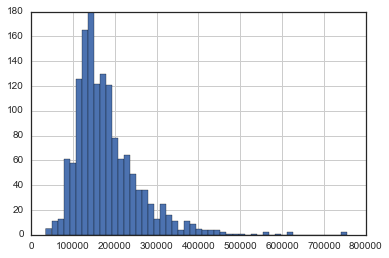

In [5]:
# Look at the target variable
print("We'll want to predict the last column : SalePrice")
print("The distribution is skewed on the right")
train.SalePrice.hist(bins = 50)

In [6]:
# Look at missing values
train.info()
print("--------------------")
print("Drop columns including too many missing values : Alley, FireplaceQu, PoolQC, Fence, MiscFeature")
print("We will infer values for columns with few NAs. New shape :")
train = train.drop(["Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"], axis = 1)
print(train.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
# Handle missing values
print("For numerical columns, replace NAs with median")
print("For categorical columns, replace NAs with most frequent value")

# Numerical columns
train.LotFrontage.fillna(train.LotFrontage.median(), inplace = True)
train.MasVnrArea.fillna(train.MasVnrArea.median(), inplace = True)
train.GarageYrBlt.fillna(train.GarageYrBlt.median(), inplace = True)

# Categorical columns
train.MasVnrType.fillna(train.MasVnrType.value_counts().idxmax(), inplace = True)
train.BsmtQual.fillna(train.BsmtQual.value_counts().idxmax(), inplace = True)
train.BsmtCond.fillna(train.BsmtCond.value_counts().idxmax(), inplace = True)
train.BsmtExposure.fillna(train.BsmtExposure.value_counts().idxmax(), inplace = True)
train.BsmtFinType1.fillna(train.BsmtFinType1.value_counts().idxmax(), inplace = True)
train.BsmtFinType2.fillna(train.BsmtFinType2.value_counts().idxmax(), inplace = True)
train.Electrical.fillna(train.Electrical.value_counts().idxmax(), inplace = True)
train.GarageType.fillna(train.GarageType.value_counts().idxmax(), inplace = True)
train.GarageFinish.fillna(train.GarageFinish.value_counts().idxmax(), inplace = True)
train.GarageQual.fillna(train.GarageQual.value_counts().idxmax(), inplace = True)
train.GarageCond.fillna(train.GarageCond.value_counts().idxmax(), inplace = True)

print("Remaining NAs : " + str(train.isnull().values.sum()))

For numerical columns, replace NAs with median
For categorical columns, replace NAs with most frequent value
Remaining NAs : 0


In [8]:
# For categorical variables, encode values as numbers so we can use those in correlation matrices
le = preprocessing.LabelEncoder()
le.fit(train.MSZoning)
train.MSZoning = le.transform(train.MSZoning)
le.fit(train.Street)
train.Street = le.transform(train.Street)
le.fit(train.LotShape)
train.LotShape = le.transform(train.LotShape)
le.fit(train.LandContour)
train.LandContour = le.transform(train.LandContour)
le.fit(train.Utilities)
train.Utilities = le.transform(train.Utilities)
le.fit(train.LotConfig)
train.LotConfig = le.transform(train.LotConfig)
le.fit(train.LandSlope)
train.LandSlope = le.transform(train.LandSlope)
le.fit(train.Neighborhood)
train.Neighborhood = le.transform(train.Neighborhood)
le.fit(train.Condition1)
train.Condition1 = le.transform(train.Condition1)
le.fit(train.Condition2)
train.Condition2 = le.transform(train.Condition2)
le.fit(train.BldgType)
train.BldgType = le.transform(train.BldgType)
le.fit(train.HouseStyle)
train.HouseStyle = le.transform(train.HouseStyle)
le.fit(train.RoofStyle)
train.RoofStyle = le.transform(train.RoofStyle)
le.fit(train.RoofMatl)
train.RoofMatl = le.transform(train.RoofMatl)
le.fit(train.Exterior1st)
train.Exterior1st = le.transform(train.Exterior1st)
le.fit(train.Exterior2nd)
train.Exterior2nd = le.transform(train.Exterior2nd)
le.fit(train.MasVnrType)
train.MasVnrType = le.transform(train.MasVnrType)
le.fit(train.ExterQual)
train.ExterQual = le.transform(train.ExterQual)
le.fit(train.ExterCond)
train.ExterCond = le.transform(train.ExterCond)
le.fit(train.BsmtQual)
train.BsmtQual = le.transform(train.BsmtQual)
le.fit(train.BsmtCond)
train.BsmtCond = le.transform(train.BsmtCond)
le.fit(train.BsmtExposure)
train.BsmtExposure = le.transform(train.BsmtExposure)
le.fit(train.BsmtFinType1)
train.BsmtFinType1 = le.transform(train.BsmtFinType1)
le.fit(train.BsmtFinType2)
train.BsmtFinType2 = le.transform(train.BsmtFinType2)
le.fit(train.Heating)
train.Heating = le.transform(train.Heating)
le.fit(train.HeatingQC)
train.HeatingQC = le.transform(train.HeatingQC)
le.fit(train.CentralAir)
train.CentralAir = le.transform(train.CentralAir)
le.fit(train.Electrical)
train.Electrical = le.transform(train.Electrical)
le.fit(train.KitchenQual)
train.KitchenQual = le.transform(train.KitchenQual)
le.fit(train.Functional)
train.Functional = le.transform(train.Functional)
le.fit(train.GarageType)
train.GarageType = le.transform(train.GarageType)
le.fit(train.GarageFinish)
train.GarageFinish = le.transform(train.GarageFinish)
le.fit(train.GarageQual)
train.GarageQual = le.transform(train.GarageQual)
le.fit(train.GarageCond)
train.GarageCond = le.transform(train.GarageCond)
le.fit(train.PavedDrive)
train.PavedDrive = le.transform(train.PavedDrive)
le.fit(train.SaleType)
train.SaleType = le.transform(train.SaleType)
le.fit(train.SaleCondition)
train.SaleCondition = le.transform(train.SaleCondition)

display(train.head())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,3,3,0,4,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,3,3,0,2,...,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,3,0,4,...,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,3,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,3,0,2,...,0,0,0,0,0,12,2008,8,4,250000


Diagonal correlation matrix for numerical variables (last row is target variable) :


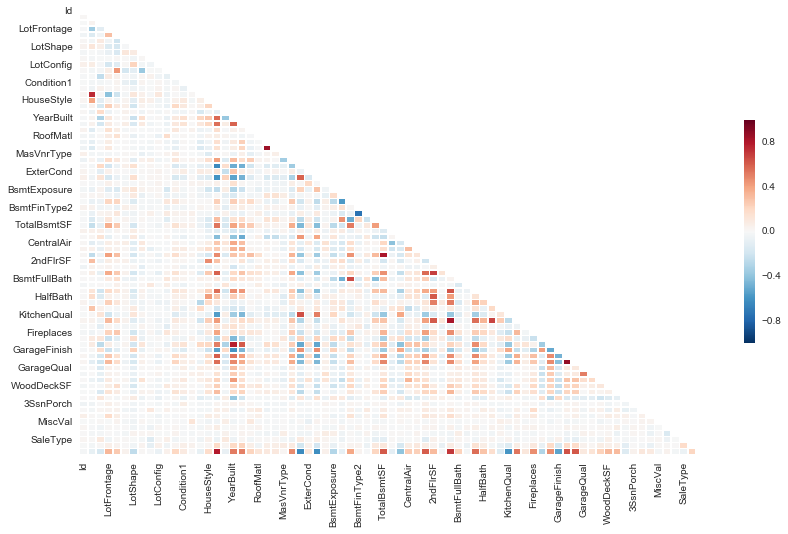

In [14]:
# Plot a pretty correlation matrix
print("Diagonal correlation matrix for numerical variables (last row is target variable) :")
corr = train.corr()
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize = (14, 8))
sns.heatmap(corr, 
            mask = mask, 
            xticklabels = 3, 
            yticklabels = 3,
            linewidths = .5, 
            cbar_kws = {"shrink": .5})

In [15]:
# Find the variables most correlated to SalePrice
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
corr = corr.SalePrice
display(corr)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
GarageYrBlt      0.466754
BsmtFinSF1       0.386420
LotFrontage      0.334771
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
CentralAir       0.251328
Electrical       0.234945
PavedDrive       0.231357
BsmtFullBath     0.227122
RoofStyle        0.222405
BsmtUnfSF        0.214479
SaleCondition    0.213092
Neighborhood     0.210851
HouseStyle       0.180163
                   ...   
Street           0.041036
BsmtFinType2     0.033235
MasVnrType       0.018216
LandContour      0.015453
Condition2       0.007513
BsmtFinSF2      -0.011378
Utilities       -0.014314
BsmtHalfBath

Most important variable for SalePrice is OverallQual : overall material and finish of the house


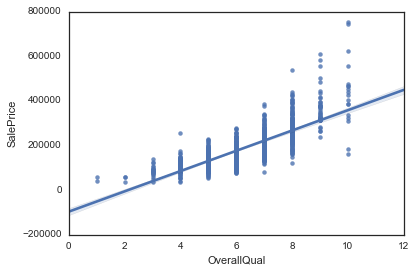

2nd most important variable for SalePrice is GrLivArea : above grade (ground) living area square feet


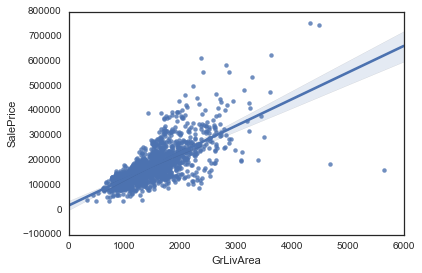

3rd most important variable for SalePrice is GarageCars : size of garage in car capacity


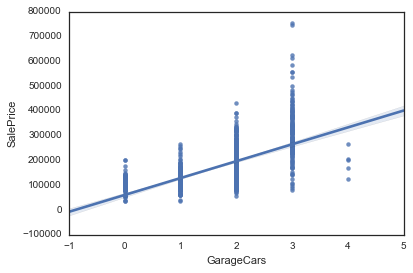

In [17]:
# Plot the 3 numerical variables most correlated with SalePrice
print("Most important variable for SalePrice is OverallQual : overall material and finish of the house")
sns.regplot(x = "OverallQual",
           y = "SalePrice", 
           data = train)
sns.plt.show()
print("2nd most important variable for SalePrice is GrLivArea : above grade (ground) living area square feet")
sns.regplot(x = "GrLivArea",
           y = "SalePrice", 
           data = train)
sns.plt.show()
print("3rd most important variable for SalePrice is GarageCars : size of garage in car capacity")
sns.regplot(x = "GarageCars",
           y = "SalePrice", 
           data = train)
sns.plt.show()